# Importing Packages

In [1]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\mirza914\Anaconda2\envs\torch_enc\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Preprocessing Data

In [2]:
mal_data=pd.read_csv('opcode_frequency_malginant.csv')

In [3]:
benign_data=pd.read_csv('opcode_frequency_benign.csv')

In [4]:
#checking for null data
benign_data.isnull().sum().sum()

0

In [5]:
#checking for null data
mal_data.isnull().sum().sum()

0

In [6]:
mal_data.head()

,FileName,1,2,3,4,5,6,7,8,9,...,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808
0,e62c764a18642df4fc82886aa0b0e14cb54d6f1b.exe.asm,98,94,91,111,623,11,19,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4eed533de4e01e1b22cf51417243d72438917991.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a3a235dd1780d9e55c686c200852a5be6b0b81cc.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,892e7c8382943342a29a6ae5a55f2272532d8e04.exe.asm,205,207,216,171,1498,21,70,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0453aa68fe249901ca4f795480898914ed20553f.exe.asm,45,18,37,22,399,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
benign_data['1808']=0
mal_data['1808']=1
data=[mal_data,benign_data]
data_orig=pd.concat(data)

In [8]:
data_orig['1808'].value_counts()

1    4060
0    2709
Name: 1808, dtype: int64

In [9]:
data_orig=data_orig.drop_duplicates()

In [10]:
data_orig=data_orig.drop(columns=['FileName'],axis=1)

In [11]:
X=data_orig.drop(columns=['1808'],axis=1)
y=data_orig['1808']

# Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [13]:
Clr=[0.001,0.01,0.1,1,10,100]
train_accuracy=[]
test_accuracy=[]
for i in Clr:
    clf = LogisticRegression(C=i).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for C="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for C=0.001
training data accuracy:0.9830575256107171
validation accuracy:0.9657412876550502
for C=0.01
training data accuracy:0.9804964539007093
validation accuracy:0.9663319551092735
for C=0.1
training data accuracy:0.9814814814814815
validation accuracy:0.9657412876550502
for C=1
training data accuracy:0.9818754925137904
validation accuracy:0.965150620200827
for C=10
training data accuracy:0.9842395587076438
validation accuracy:0.9669226225634967
for C=100
training data accuracy:0.9818754925137904
validation accuracy:0.9657412876550502


Text(0, 0.5, 'Accuracy')

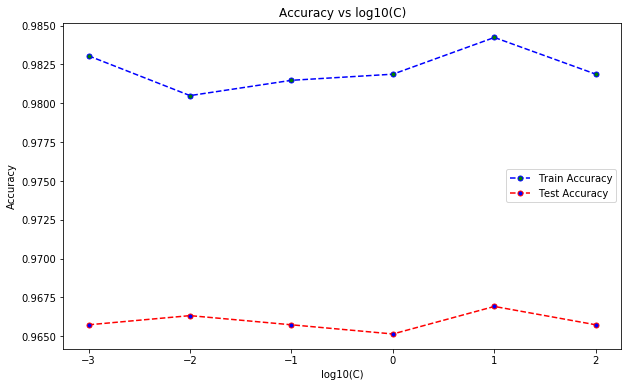

In [14]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(np.log10(Clr),train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(np.log10(Clr),test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs log10(C)')
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')

In [15]:
lr=LogisticRegression(C=0.01).fit(X,y)
print(accuracy_score(lr.predict(X),y))

0.9776924213325454


# Support Vector Machines

In [16]:
Csvm=[0.001,0.01,0.1,1,10,100]
train_accuracy=[]
test_accuracy=[]
for i in Csvm:
    clf = SVC(C=i,kernel='rbf').fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for C="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for C=0.001
training data accuracy:0.5986997635933806
validation accuracy:0.603071470761961
for C=0.01
training data accuracy:0.5986997635933806
validation accuracy:0.603071470761961
for C=0.1
training data accuracy:0.6349487785657998
validation accuracy:0.6391021854695806
for C=1
training data accuracy:0.9986209613869188
validation accuracy:0.7241582988777319
for C=10
training data accuracy:0.9988179669030733
validation accuracy:0.7277023036030714
for C=100
training data accuracy:0.9990149724192278
validation accuracy:0.7271116361488482


Text(0, 0.5, 'Accuracy')

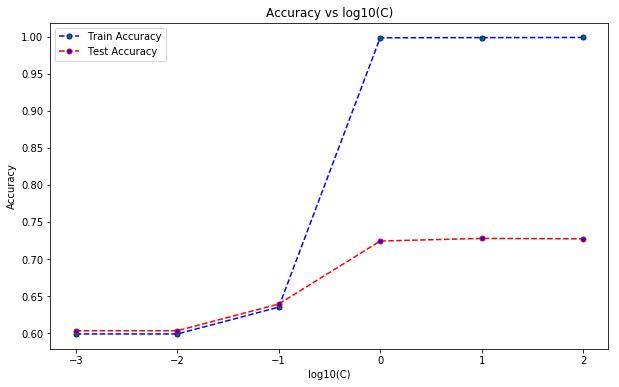

In [17]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(np.log10(Clr),train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(np.log10(Clr),test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs log10(C)')
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')

In [18]:
svmrbf=SVC(kernel='rbf',C=0.1).fit(X,y)
print(accuracy_score(svmrbf.predict(X),y))

0.6460333875018467


# KNN

In [19]:
n=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in n:
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for n_neighbors="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for n_neighbors=1
training data accuracy:0.9992119779353822
validation accuracy:0.9781453041937389
for n_neighbors=3
training data accuracy:0.9885736800630418
validation accuracy:0.9757826343768459
for n_neighbors=5
training data accuracy:0.9832545311268716
validation accuracy:0.9704666272888364
for n_neighbors=7
training data accuracy:0.9763593380614657
validation accuracy:0.9681039574719433
for n_neighbors=10
training data accuracy:0.9702521670606777
validation accuracy:0.9604252805670408
for n_neighbors=12
training data accuracy:0.9698581560283688
validation accuracy:0.9580626107501476
for n_neighbors=15
training data accuracy:0.9692671394799054
validation accuracy:0.9556999409332546
for n_neighbors=20
training data accuracy:0.9643420015760441
validation accuracy:0.9515652687536916


Text(0, 0.5, 'Accuracy')

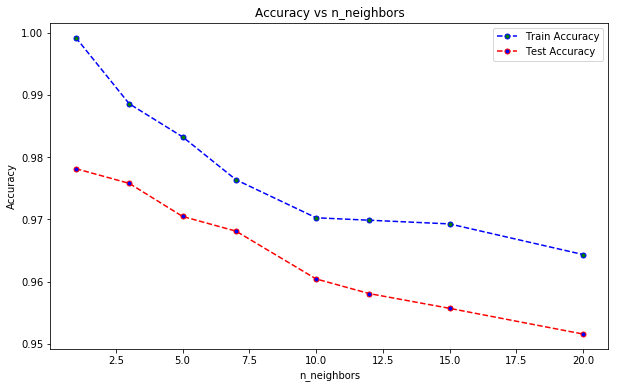

In [20]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(n,train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(n,test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [21]:
knn=KNeighborsClassifier(n_neighbors=3).fit(X,y)
print(accuracy_score(knn.predict(X),y))

0.9880336829664648


# KNN with scaled features

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X)
scaled_data=scaler.transform(X)
scaled_data_pd=pd.DataFrame(scaled_data,columns=X.columns)


In [23]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_data_pd,y,random_state=0)

In [24]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_sc,y_train_sc)
print(accuracy_score(clf.predict(X_train_sc),y_train_sc))
print(accuracy_score(clf.predict(X_test_sc),y_test_sc))

0.9868006304176516
0.9716479621972829


In [25]:
knn_1=KNeighborsClassifier(n_neighbors=3).fit(scaled_data_pd,y)
print(accuracy_score(knn_1.predict(scaled_data_pd),y))

0.9864086275668489


# Decision Tree

In [26]:
depth=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for max_depth"+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for max_depth1
training data accuracy:0.8654452324665091
validation accuracy:0.8375664500886001
for max_depth3
training data accuracy:0.9505516154452325
validation accuracy:0.93502658003544
for max_depth5
training data accuracy:0.9678881008668243
validation accuracy:0.9527466036621383
for max_depth7
training data accuracy:0.9765563435776202
validation accuracy:0.9592439456585942
for max_depth10
training data accuracy:0.9820724980299448
validation accuracy:0.9639692852923804
for max_depth12
training data accuracy:0.9862096138691884
validation accuracy:0.9669226225634967
for max_depth15
training data accuracy:0.9879826635145784
validation accuracy:0.9669226225634967
for max_depth20
training data accuracy:0.997832939322301
validation accuracy:0.9763733018310691


Text(0, 0.5, 'Accuracy')

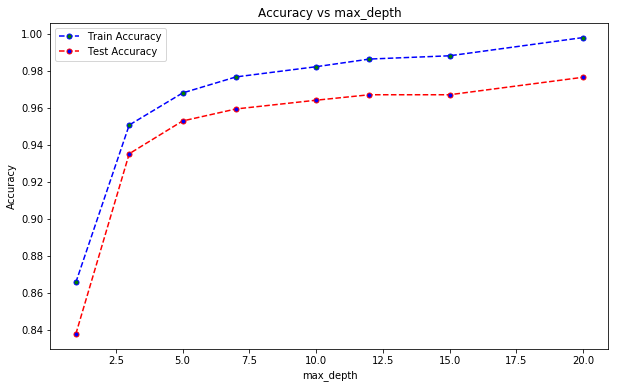

In [27]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(depth,train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(depth,test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [28]:
dec=DecisionTreeClassifier(max_depth=12).fit(X,y)
print(accuracy_score(dec.predict(X),y))

0.9856699660215689


# RandomForest Classsifier

In [29]:
depth=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in depth:
    clf = RandomForestClassifier(max_depth=i,n_estimators=50).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for max_depth="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for max_depth=1
training data accuracy:0.8341213553979512
validation accuracy:0.8180744240992321
for max_depth=3
training data accuracy:0.9336091410559496
validation accuracy:0.9125812167749557
for max_depth=5
training data accuracy:0.960795902285264
validation accuracy:0.9432959243945659
for max_depth=7
training data accuracy:0.9791174152876281
validation accuracy:0.961015948021264
for max_depth=10
training data accuracy:0.9913317572892041
validation accuracy:0.9763733018310691
for max_depth=12
training data accuracy:0.9936958234830575
validation accuracy:0.9775546367395157
for max_depth=15
training data accuracy:0.9984239558707644
validation accuracy:0.9810986414648553
for max_depth=20
training data accuracy:0.9992119779353822
validation accuracy:0.9846426461901949


Text(0, 0.5, 'Accuracy')

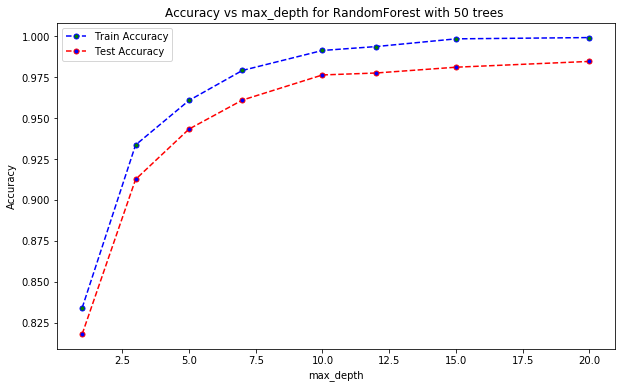

In [30]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(depth,train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(depth,test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs max_depth for RandomForest with 50 trees ')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [31]:
rnd_2=RandomForestClassifier(max_depth=20,n_estimators=50).fit(X,y)
print("accuracy with 50 estimators:")
print(accuracy_score(rnd_2.predict(X),y))

accuracy with 50 estimators:
0.9989658738366081


# Dropping least important Opcodes

In [33]:
feature_importances = pd.DataFrame(rnd_2.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [34]:
feature_importances.head()

,importance
925,0.030715
234,0.030197
671,0.029851
1058,0.029179
1022,0.028172


In [35]:
#dropping features with importance weight=0
to_drop_features=list(np.where(feature_importances.importance==0)[0])
to_drop_features=[str(x) for x in to_drop_features]

In [36]:
len(to_drop_features)

1220

In [37]:
X_new=X.drop(columns=to_drop_features,axis=1)

In [38]:
X_new.shape

(6769, 587)

In [39]:
X_final=X_new

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state=0)

In [41]:
depth=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in depth:
    clf = RandomForestClassifier(max_depth=i,n_estimators=200).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for max_depth="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("==============================================")

for max_depth=1
training data accuracy:0.8295902285263987
validation accuracy:0.8174837566450088
for max_depth=3
training data accuracy:0.9408983451536643
validation accuracy:0.9167158889545186
for max_depth=5
training data accuracy:0.9623719464144996
validation accuracy:0.9438865918487891
for max_depth=7
training data accuracy:0.9736012608353034
validation accuracy:0.954518606024808
for max_depth=10
training data accuracy:0.9913317572892041
validation accuracy:0.9763733018310691
for max_depth=12
training data accuracy:0.9938928289992119
validation accuracy:0.9746012994683992
for max_depth=15
training data accuracy:0.9974389282899921
validation accuracy:0.9775546367395157
for max_depth=20
training data accuracy:0.9990149724192278
validation accuracy:0.9781453041937389


Text(0, 0.5, 'Accuracy')

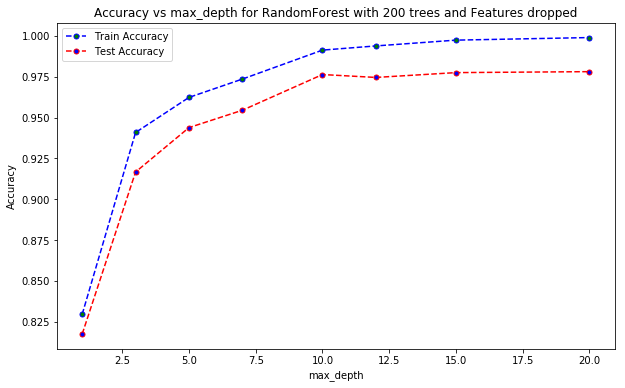

In [42]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(depth,train_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(depth,test_accuracy,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Accuracy","Test Accuracy"])
plt.title('Accuracy vs max_depth for RandomForest with 200 trees and Features dropped')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [44]:
X_new.shape

(6769, 587)

In [45]:
rnd_3=RandomForestClassifier(max_depth=20,n_estimators=200).fit(X_new,y)
print("accuracy with 200 estimators:")
print(accuracy_score(rnd_3.predict(X_new),y))

accuracy with 200 estimators:
0.9989658738366081


In [46]:
len(rnd_3.feature_importances_)

587

In [47]:
feature_importances= pd.DataFrame(rnd_3.feature_importances_,index = X_new.columns,columns=['importance']).sort_values('importance',ascending=False)

In [48]:
#Most important Opcodes
feature_importances.head()

,importance
472,0.037290
7,0.028259
447,0.024144
494,0.023578
568,0.022961


# Applying PCA to reduce dimensions

In [49]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)

In [50]:
X_final.shape

(6769, 587)

In [51]:
X_pca = pca.fit_transform(X_final)

In [52]:
pc_df = pd.DataFrame(data = X_pca , 
        columns = np.arange(5))
pc_df.head()

,0,1,2,3,4
0,2516.340646,-231.319232,298.438933,-94.495447,-191.268990
1,-2339.714332,-367.700058,-979.519431,-470.190191,145.654430
2,-2373.010858,-429.861732,-978.661575,-477.563078,149.345870
3,828.419160,-528.613380,2302.689233,89.445094,340.242046
4,-146.561213,-396.569304,-394.897099,-147.862380,111.819352


In [53]:
X_train, X_test, y_train, y_test = train_test_split(pc_df,y,random_state=0)

In [54]:
clf = RandomForestClassifier(max_depth=20,n_estimators=300).fit(X_train,y_train)
print(accuracy_score(clf.predict(X_train),y_train))
print(accuracy_score(clf.predict(X_test),y_test))

0.9992119779353822
0.9704666272888364


In [55]:
clf = RandomForestClassifier(max_depth=20,n_estimators=300).fit(X_pca,y)
print(accuracy_score(clf.predict(X_pca),y))


0.9989658738366081


In [56]:
pca.explained_variance_ratio_

array([0.53941168, 0.20780656, 0.13054913, 0.03768327, 0.02379643])

# Comparing Models

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
print("Logistic-Regression:")
print(confusion_matrix(lr.predict(X), y))
print(classification_report(lr.predict(X), y))

Logistic-Regression:
[[2668  110]
 [  41 3950]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      2778
          1       0.97      0.99      0.98      3991

avg / total       0.98      0.98      0.98      6769



In [59]:
print("SVM:")
print(confusion_matrix(svmrbf.predict(X), y))
print(classification_report(svmrbf.predict(X), y))

SVM:
[[ 322    9]
 [2387 4051]]
             precision    recall  f1-score   support

          0       0.12      0.97      0.21       331
          1       1.00      0.63      0.77      6438

avg / total       0.95      0.65      0.74      6769



In [60]:
print("KNN:")
print(confusion_matrix(knn.predict(X), y))
print(classification_report(knn.predict(X), y))

KNN:
[[2666   38]
 [  43 4022]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2704
          1       0.99      0.99      0.99      4065

avg / total       0.99      0.99      0.99      6769



In [61]:
print("KNN with scaling features:")
print(confusion_matrix(knn_1.predict(scaled_data_pd), y))
print(classification_report(knn_1.predict(scaled_data_pd), y))

KNN with scaling features:
[[2672   55]
 [  37 4005]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2727
          1       0.99      0.99      0.99      4042

avg / total       0.99      0.99      0.99      6769



In [62]:
print("DecisionTree:")
print(confusion_matrix(dec.predict(X), y))
print(classification_report(dec.predict(X), y))

DecisionTree:
[[2709   97]
 [   0 3963]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      2806
          1       0.98      1.00      0.99      3963

avg / total       0.99      0.99      0.99      6769



In [64]:
print("RandomForest with 50 trees:")
print(confusion_matrix(rnd_2.predict(X), y))
print(classification_report(rnd_2.predict(X), y))

RandomForest with 50 trees:
[[2709    7]
 [   0 4053]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2716
          1       1.00      1.00      1.00      4053

avg / total       1.00      1.00      1.00      6769



In [65]:
print("RandomForest with dropped features:")
print(confusion_matrix(rnd_3.predict(X_new), y))
print(classification_report(rnd_3.predict(X_new), y))

RandomForest with dropped features:
[[2709    7]
 [   0 4053]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2716
          1       1.00      1.00      1.00      4053

avg / total       1.00      1.00      1.00      6769



In [66]:
print("RandomForest with pca:")
print(confusion_matrix(clf.predict(X_pca), y))
print(classification_report(clf.predict(X_pca), y))

RandomForest with pca:
[[2709    7]
 [   0 4053]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2716
          1       1.00      1.00      1.00      4053

avg / total       1.00      1.00      1.00      6769

